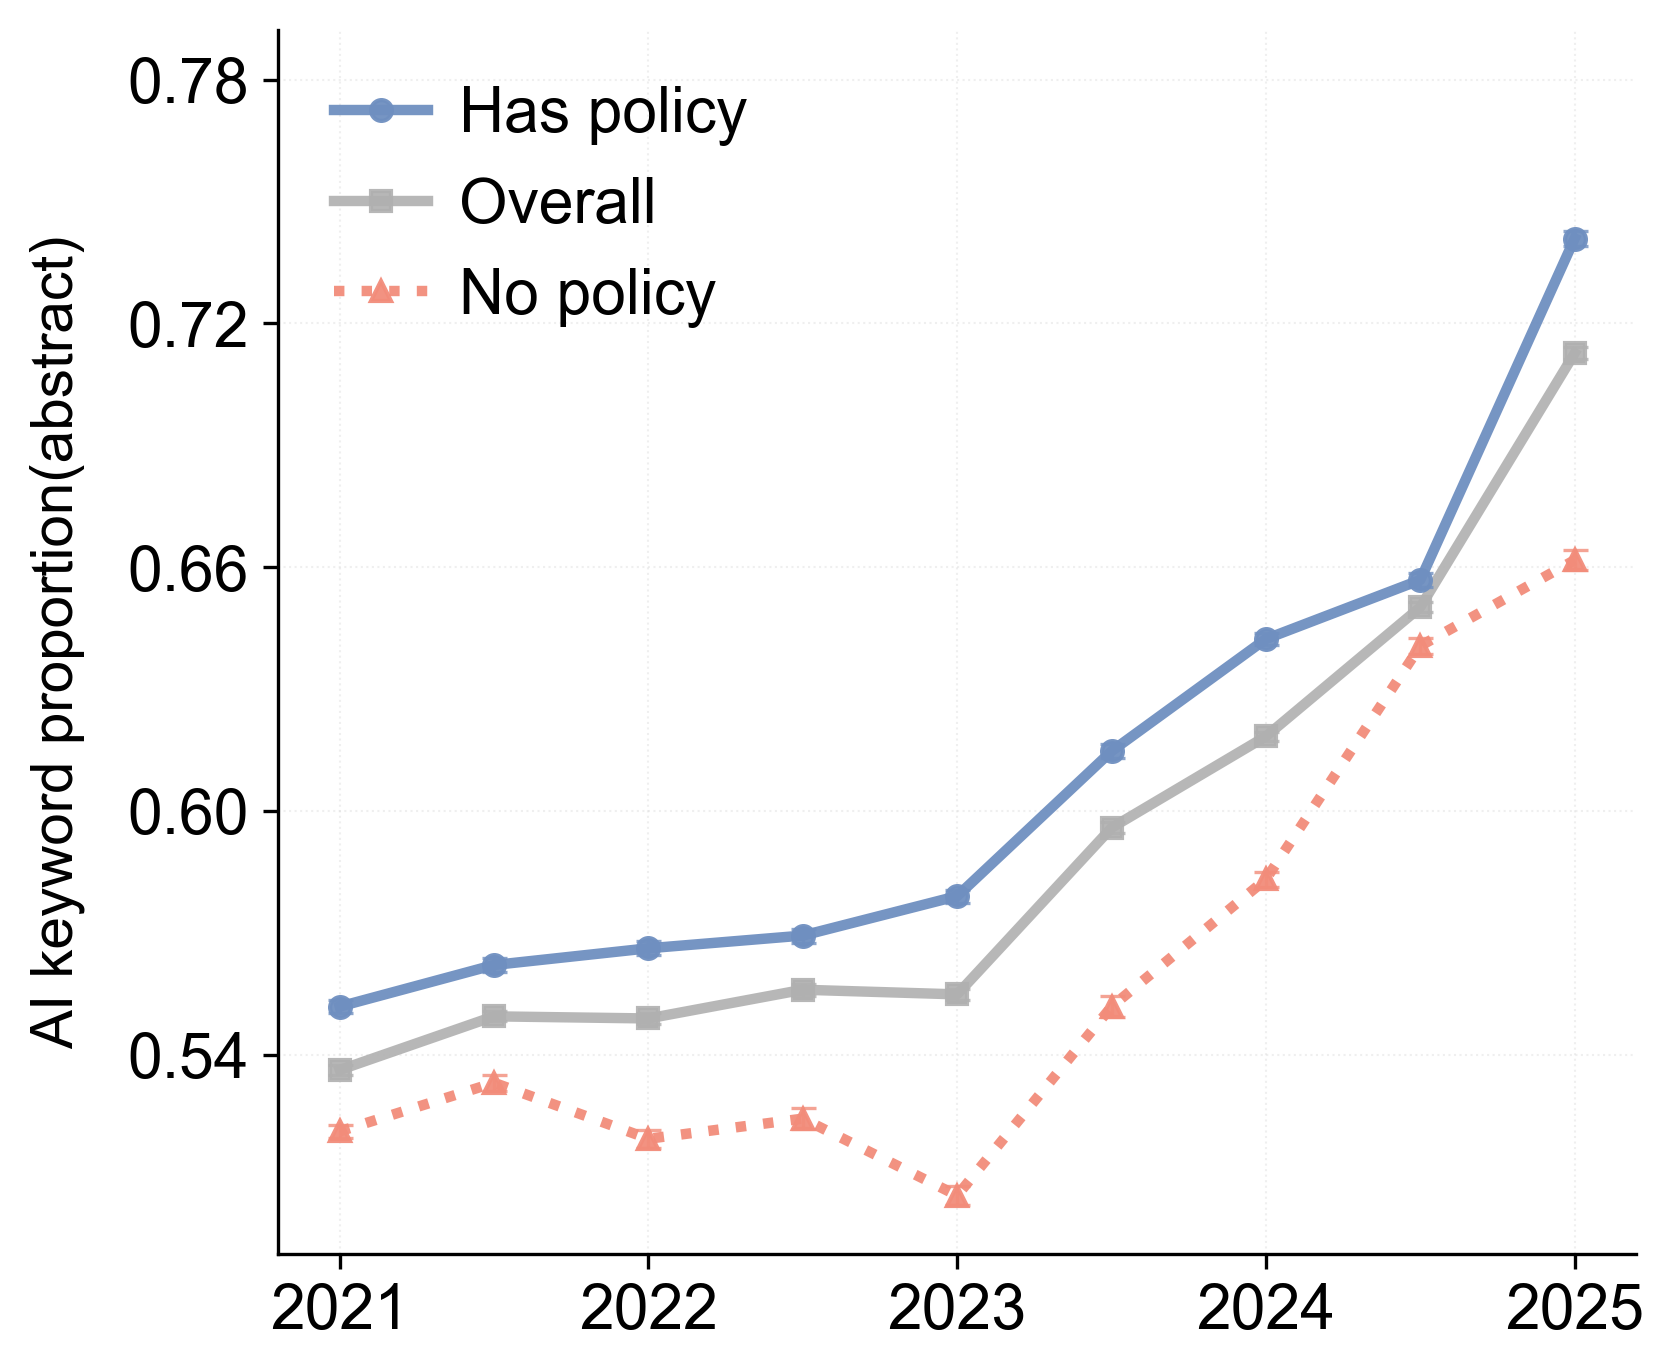

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

overall_path = r"ai_policy/results/keyword_res/by_half_year.csv"
policy_path  = r"ai_policy/results/keyword_res/by_half_year_policy.csv"

overall = pd.read_csv(overall_path)  
policy  = pd.read_csv(policy_path)

h_order = {'H1': 1, 'H2': 2}

overall_sorted = overall.sort_values(["year", "half_year"], key=lambda c: c.map(h_order) if c.name == "half_year" else c)
periods = [(int(r.year), r.half_year) for _, r in overall_sorted.iterrows()
           if (int(r.year) < 2025) or (int(r.year) == 2025 and r.half_year == "H1")]
x = np.arange(len(periods))

def pick_overall(y, h):
    row = overall[(overall["year"] == y) & (overall["half_year"] == h)]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

def pick_policy(y, h, has_policy):
    row = policy[(policy["year"] == y) & (policy["half_year"] == h) & (policy["has_ai_policy"] == has_policy)]
    if row.empty: return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return float(r["mean"]), float(r["ci_lower"]), float(r["ci_upper"])

overall_mean, overall_lo, overall_hi = zip(*[pick_overall(y, h) for y, h in periods])
true_mean, true_lo, true_hi         = zip(*[pick_policy(y, h, True)  for y, h in periods])
false_mean, false_lo, false_hi      = zip(*[pick_policy(y, h, False) for y, h in periods])

overall_mean = np.array(overall_mean, dtype=float)
true_mean    = np.array(true_mean, dtype=float)
false_mean   = np.array(false_mean, dtype=float)
def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15,
    'axes.labelsize': 15,
    'axes.titlesize': 14,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 0.8,
    'lines.linewidth': 2.5
})

colors = {'with': '#6f8fc0', 'without': '#f28c7a', 'overall': '#b0b0b0'}

fig, ax = plt.subplots(figsize=(6, 5))

# Overall
ax.plot(x, overall_mean, marker='s', markersize=5, linestyle='-', color=colors['overall'],
        label='Overall', alpha=0.9, zorder=3)
ax.errorbar(x, overall_mean,
            yerr=[overall_mean - np.array(overall_lo), np.array(overall_hi) - overall_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['overall'],
            elinewidth=0.8, alpha=0.8, zorder=2)

# With policy
ax.plot(x, true_mean, marker='o', markersize=5, linestyle='-', color=colors['with'],
        label='Has policy', zorder=4, alpha=0.95)
ax.errorbar(x, true_mean,
            yerr=[true_mean - np.array(true_lo), np.array(true_hi) - true_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['with'],
            elinewidth=0.8, alpha=0.8, zorder=3)

# Without policy
ax.plot(x, false_mean, marker='^', markersize=5, linestyle=':', color=colors['without'],
        label='No policy', zorder=4, alpha=0.95)
ax.errorbar(x, false_mean,
            yerr=[false_mean - np.array(false_lo), np.array(false_hi) - false_mean],
            fmt='none', capsize=3, capthick=0.8, ecolor=colors['without'],
            elinewidth=0.8, alpha=0.8, zorder=3)

year_ticks, year_labels = [], []
for i, (y, h) in enumerate(periods):
    if str(y) not in year_labels and str(y) in ['2021', '2022', '2023', '2024', '2025']:
        year_ticks.append(i)
        year_labels.append(str(y))
ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels)

ax.set_ylabel('AI keyword proportion(abstract)', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, color='#D9D9D9')

handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 2]  # With policy, Overall, Without policy
ax.legend([handles[i] for i in order], [labels[i] for i in order],
          frameon=False, loc='best', ncol=1, handletextpad=0.5, columnspacing=1.0, handlelength=1.5)

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.05)
ax.yaxis.set_major_locator(MaxNLocator(integer=False, prune='both', nbins=6))

plt.tight_layout(pad=1.5)
save_transparent_figure('overrall——key')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches

def apply_unified_style():
    plt.style.use('default')
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 15,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 15,
        'ytick.labelsize': 15,
        'legend.fontsize': 15,
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'axes.linewidth': 0.8,
        'lines.linewidth': 2.0,
    })

apply_unified_style()

policy_categories = ['Disclosure Required', 'Not Mentioned', 'Strict Prohibition', 'Open']
policy_counts = [3556, 1529,7, 2
fig = plt.figure(figsize=(10, 5))

ax_main = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)


bars = ax_main.bar(range(len(policy_categories)), policy_counts, 
                   color='#8dd3c9', edgecolor='black', linewidth=1, alpha=0.9)



for i, bar in enumerate(bars):
    height = bar.get_height()
    ax_main.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=13, fontweight='bold')

ax_main.set_xticks(range(len(policy_categories)))
ax_main.set_xticklabels(wrapped_labels, ha='center')
ax_main.set_ylabel('Number of Journals', labelpad=10, fontsize=14)
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)
ax_main.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, axis='y')




plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  

plt.savefig('combined_policy_location_distribution.png', dpi=600, bbox_inches='tight',transparent=True)
plt.savefig('combined_policy_location_distribution.tiff', dpi=600, bbox_inches='tight',transparent=True)

plt.show()



SyntaxError: '[' was never closed (1918735649.py, line 29)

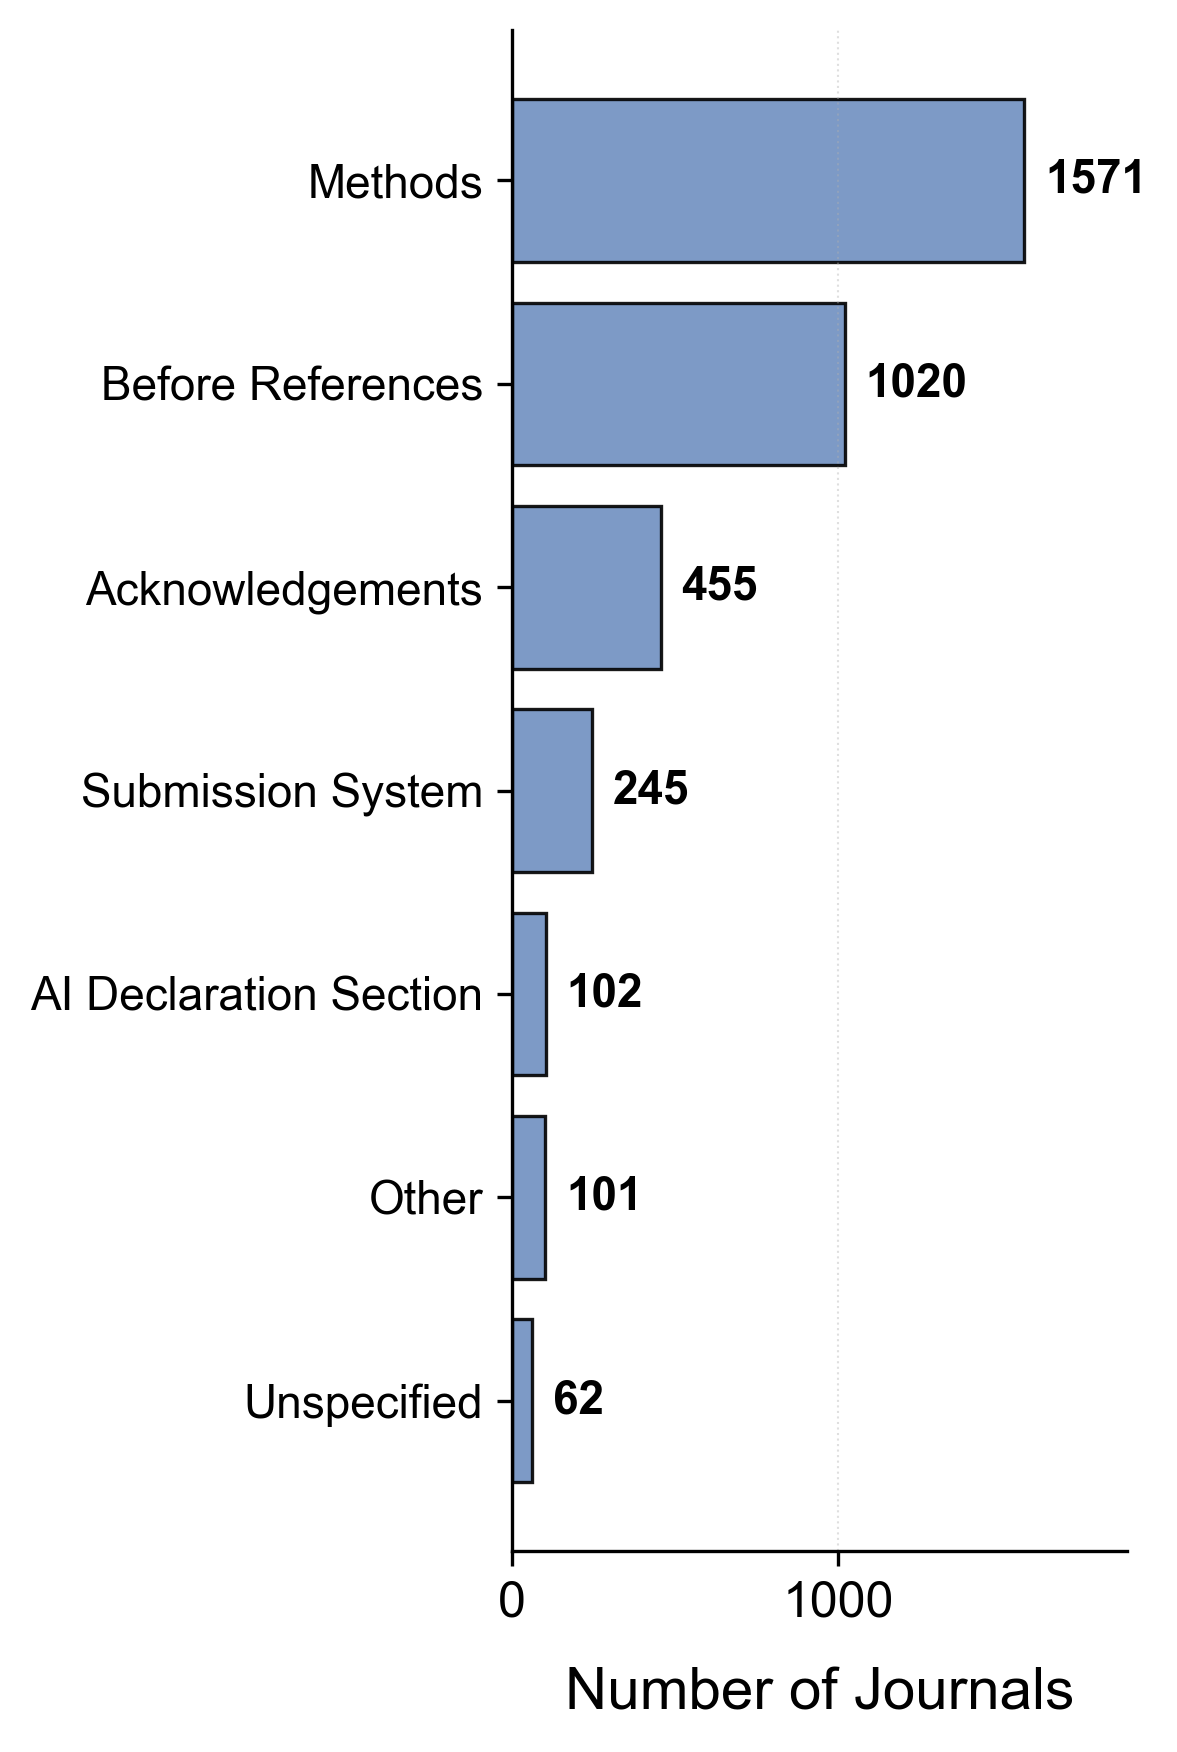

第一个图 (Location Distribution) 已显示


C:\Users\ningji\AppData\Local\Temp\ipykernel_13608\1589318582.py:334: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


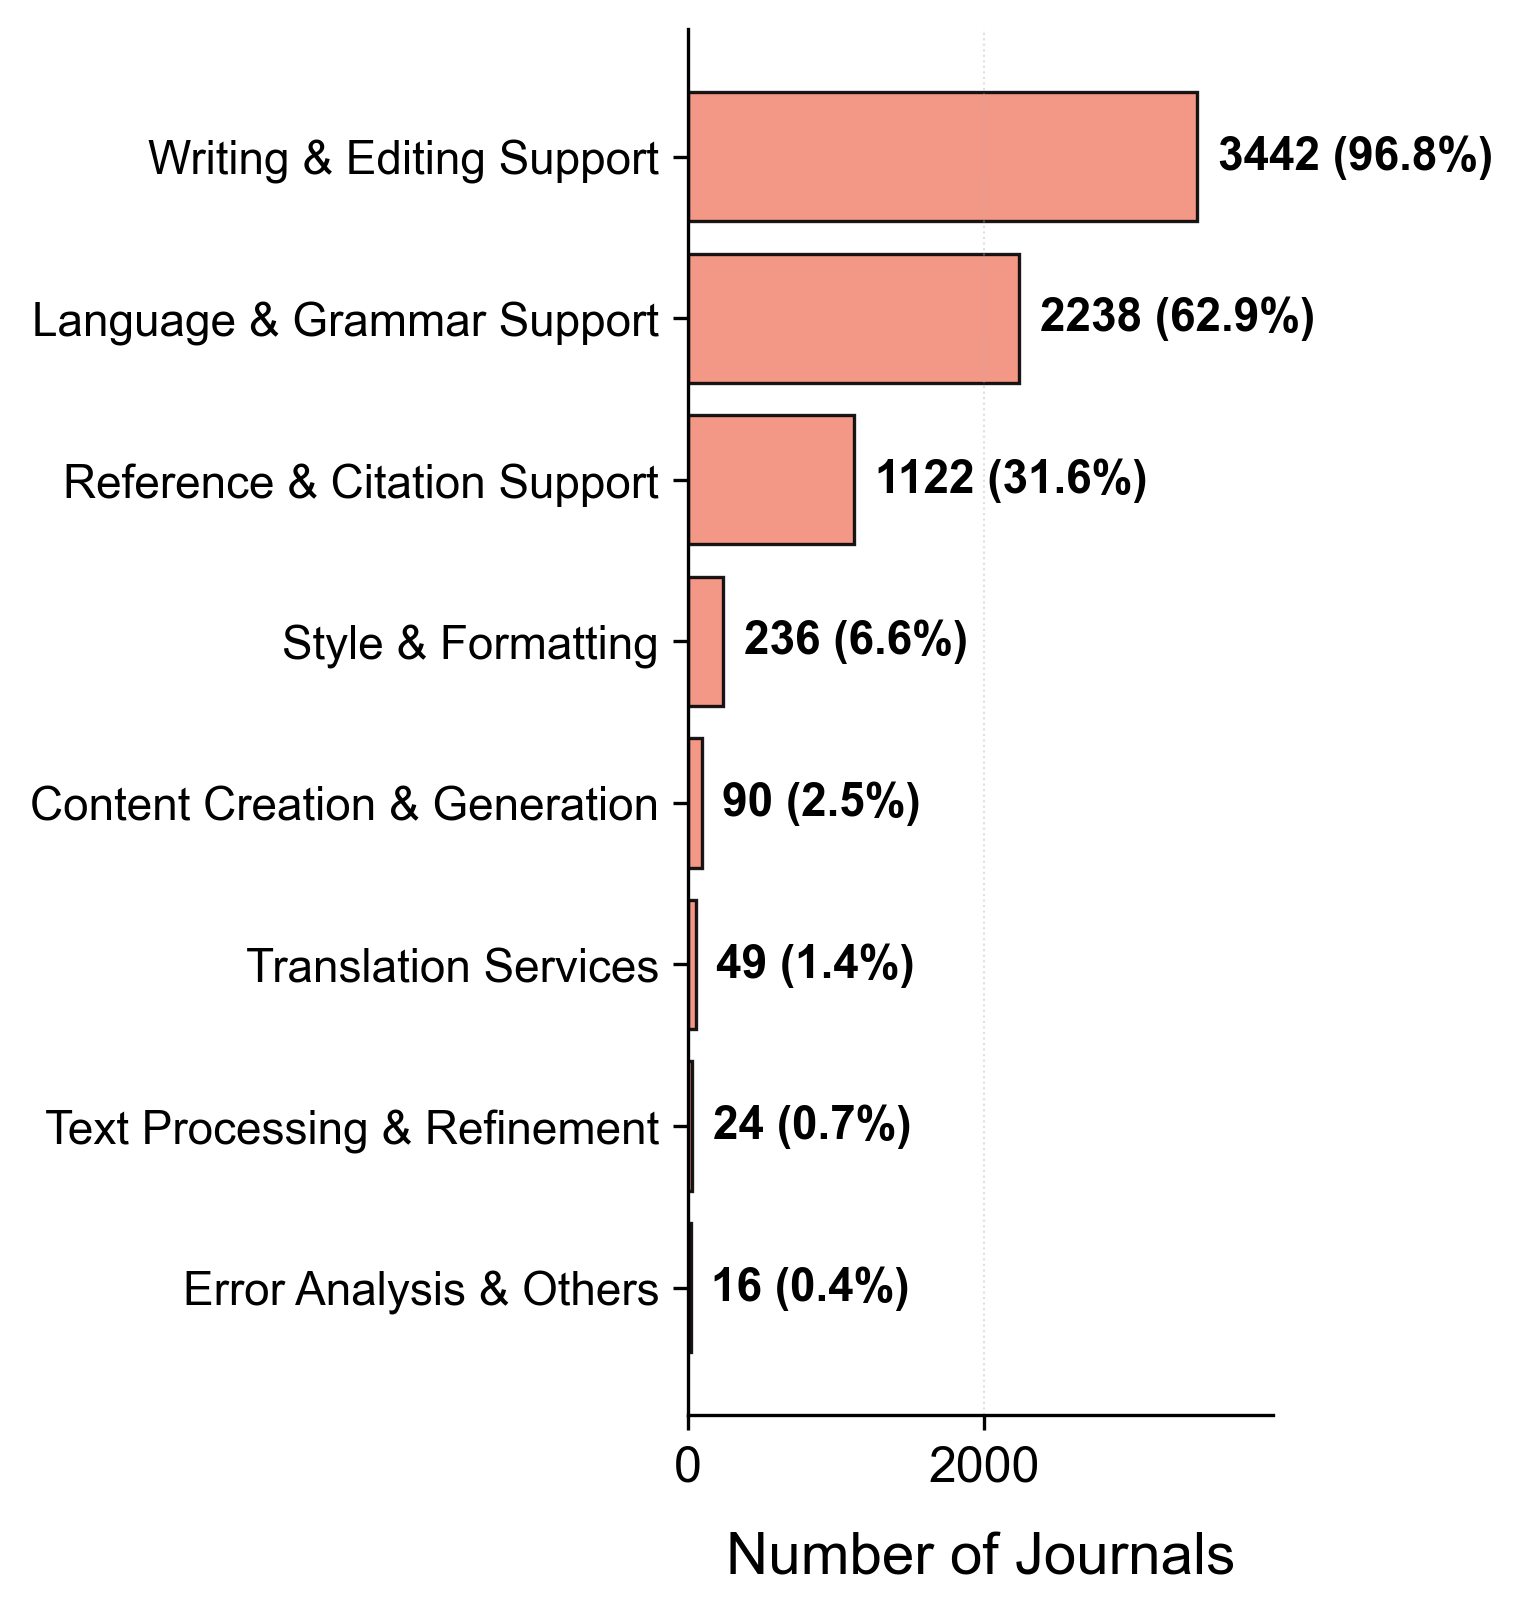

第二个图 (AI Usage Categories) 已显示

=== 统一后的图表配置 ===
图形尺寸: (3, 6)
X轴范围: 0 到 3958
第一个图最大值: 1571
第二个图最大值: 3442
合并后数据总数: 3556 条记录

=== 第二个图类别统计 ===
Writing & Editing Support: 3442 (96.8%)
Language & Grammar Support: 2238 (62.9%)
Reference & Citation Support: 1122 (31.6%)
Style & Formatting: 236 (6.6%)
Content Creation & Generation: 90 (2.5%)
Translation Services: 49 (1.4%)
Text Processing & Refinement: 24 (0.7%)
Error Analysis & Others: 16 (0.4%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

# Set unified style
def apply_unified_style():
    plt.style.use('default')
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'axes.linewidth': 0.8,
        'lines.linewidth': 2.0,
    })

# Apply style
apply_unified_style()

locations = ['Methods', 'Before References', 'Acknowledgements', 'Submission System', 
             'AI Declaration Section', 'Other','Unspecified']
location_counts = [1571, 1020, 455, 245, 102, 101, 62]

merged_data = pd.read_csv(r'ai_policy\merged_usage_journal_data.csv')

comprehensive_merge_mapping = {
    "Grammar checking": "Language & Grammar Support",
    "Grammar correction": "Language & Grammar Support", 
    "Grammar improvement": "Language & Grammar Support",
    "Grammar enhancement": "Language & Grammar Support",
    "Grammar suggestions": "Language & Grammar Support",
    "Grammar": "Language & Grammar Support",
    "Grammar and spelling check": "Language & Grammar Support",
    "Grammar and style improvement": "Language & Grammar Support",
    "Spelling and grammar improvement": "Language & Grammar Support",
    "Spelling checking": "Language & Grammar Support",
    "Spelling correction": "Language & Grammar Support",
    "Spelling improvement": "Language & Grammar Support",
    "Spelling assistance": "Language & Grammar Support",
    "Spelling": "Language & Grammar Support",
    "Spell checking": "Language & Grammar Support",
    "Spelling check": "Language & Grammar Support",
    "Spelling checks": "Language & Grammar Support",
    "Language enhancement": "Language & Grammar Support",
    "Language improvement": "Language & Grammar Support",
    "Language polishing": "Language & Grammar Support",
    "Language editing": "Language & Grammar Support",
    "Language accuracy enhancement": "Language & Grammar Support",
    "Improving language": "Language & Grammar Support",
    "English improvement": "Language & Grammar Support",
    "Linguistic quality enhancement": "Language & Grammar Support",
    "Language barrier overcoming": "Language & Grammar Support",
    "Language proofreading": "Language & Grammar Support",
    
    # 2. Writing & Editing Support
    "General writing assistance": "Writing & Editing Support",
    "Writing assistance": "Writing & Editing Support",
    "Medical writing assistance": "Writing & Editing Support",
    "General editing": "Writing & Editing Support",
    "Editing": "Writing & Editing Support",
    "AI assisted copy editing": "Writing & Editing Support",
    "Text editing": "Writing & Editing Support",
    "Content editing": "Writing & Editing Support",
    "Editing optimization": "Writing & Editing Support",
    "Editing of the manuscript": "Writing & Editing Support",
    "Editing of the text": "Writing & Editing Support",
    "Editing text": "Writing & Editing Support",
    "General text editing": "Writing & Editing Support",
    "Light editing": "Writing & Editing Support",
    "Writing editing": "Writing & Editing Support",
    "Copyediting": "Writing & Editing Support",
    "Editing tool usage": "Writing & Editing Support",
    "Readability improvement": "Writing & Editing Support",
    "Readability enhancement": "Writing & Editing Support",
    "Clarity improvement": "Writing & Editing Support",
    "Quality improvement": "Writing & Editing Support",
    "Structure improvement": "Writing & Editing Support",
    "Structure enhancement": "Writing & Editing Support",
    "Sentence structure improvement": "Writing & Editing Support",
    "Phrase suggestion": "Writing & Editing Support",
    "Synonym suggestions": "Writing & Editing Support",
    "Personalized feedback": "Writing & Editing Support",
    "Accessibility enhancement": "Writing & Editing Support",
    
    # 3. Style & Formatting
    "Style enhancement": "Style & Formatting",
    "Style improvement": "Style & Formatting",
    "Style and tone suggestions": "Style & Formatting",
    "Tone adjustment": "Style & Formatting",
    "Wording changes": "Style & Formatting",
    "Formatting changes": "Style & Formatting",
    "Formatting": "Style & Formatting",
    "Punctuation correction": "Style & Formatting",
    "Text formatting": "Style & Formatting",
    
    # 4. Content Creation & Generation
    "Content generation": "Content Creation & Generation",
    "Content creation": "Content Creation & Generation",
    "Text generation": "Content Creation & Generation",
    "Text content generation": "Content Creation & Generation",
    "Text creation": "Content Creation & Generation",
    "Abstract writing": "Content Creation & Generation",
    "Drafting text": "Content Creation & Generation",
    "Drafting of the manuscript": "Content Creation & Generation",
    "Drafting of scientific manuscripts": "Content Creation & Generation",
    "Writing of the manuscript": "Content Creation & Generation",
    "Writing of a manuscript": "Content Creation & Generation",
    "Manuscript preparation": "Content Creation & Generation",
    "Plain-language summaries": "Content Creation & Generation",
    "Literature review assistance": "Content Creation & Generation",
    "Reporting standards": "Content Creation & Generation",
    
    # 5. Reference & Citation Support
    "Reference checking": "Reference & Citation Support",
    "Reference generation": "Reference & Citation Support",
    "Reference management": "Reference & Citation Support",
    "Reference organizing": "Reference & Citation Support",
    "Reference clean up": "Reference & Citation Support",
    "Reference list preparation": "Reference & Citation Support",
    "Compilation of references": "Reference & Citation Support",
    
    # 6. Translation Services
    "Translation": "Translation Services",
    "Language translation": "Translation Services",
    "Translation of own words": "Translation Services",
    
    # 7. Text Processing & Refinement
    "Text correcting": "Text Processing & Refinement",
    "Text refining": "Text Processing & Refinement",
    "Text revision": "Text Processing & Refinement",
    "Text incorporation": "Text Processing & Refinement",
    "Text snippet inclusion": "Text Processing & Refinement",
    "Paraphrasing": "Text Processing & Refinement",
    "Summarizing": "Text Processing & Refinement",
    "Condensing writing": "Text Processing & Refinement",
    "Polishing writing": "Text Processing & Refinement",
    "Revising": "Text Processing & Refinement",
    "Reviewing": "Text Processing & Refinement",
    
    # 8. Error Analysis & Others
    "Error in analysis": "Error Analysis & Others",
}


usage_by_journal = {}
total_journals_with_usage = len(merged_data)

for idx, row in merged_data.iterrows():
    allowed_usage = row['Allowed_Usage']
    journal_name = row['journal_name']
    
    if pd.notna(allowed_usage):
        usages = [usage.strip() for usage in str(allowed_usage).split(';') if usage.strip()]
        
        for usage in usages:
            if usage not in usage_by_journal:
                usage_by_journal[usage] = set()
            usage_by_journal[usage].add(journal_name)

merged_categories = {}
unmerged_items = []

for usage, journals in usage_by_journal.items():
    if usage in comprehensive_merge_mapping:
        category = comprehensive_merge_mapping[usage]
        if category not in merged_categories:
            merged_categories[category] = set()
        merged_categories[category].update(journals)
    else:
        unmerged_items.append((usage, journals))

for usage, journals in unmerged_items:
    usage_lower = usage.lower()
    
    if any(word in usage_lower for word in ['grammar', 'spelling', 'language']):
        category = "Language & Grammar Support"
    elif any(word in usage_lower for word in ['writing', 'editing', 'quality', 'clarity', 'readability']):
        category = "Writing & Editing Support"
    elif any(word in usage_lower for word in ['style', 'tone', 'format', 'punctuation']):
        category = "Style & Formatting"
    elif any(word in usage_lower for word in ['content', 'generation', 'creation', 'drafting', 'manuscript']):
        category = "Content Creation & Generation"
    elif any(word in usage_lower for word in ['reference', 'citation']):
        category = "Reference & Citation Support"
    elif any(word in usage_lower for word in ['translation', 'translate']):
        category = "Translation Services"
    elif any(word in usage_lower for word in ['text', 'revision', 'refining', 'polishing', 'paraphras', 'summar']):
        category = "Text Processing & Refinement"
    else:
        category = "Error Analysis & Others"
    
    if category not in merged_categories:
        merged_categories[category] = set()
    merged_categories[category].update(journals)

final_counts = {category: len(journals) for category, journals in merged_categories.items()}
final_sorted = dict(sorted(final_counts.items(), key=lambda x: x[1], reverse=True))

categories = list(final_sorted.keys())
usage_counts = list(final_sorted.values())
percentages = [(count / total_journals_with_usage) * 100 for count in usage_counts]

max_value = max(max(location_counts), max(usage_counts))
x_limit = int(max_value * 1.15)  

FIGURE_CONFIG = {
    'figsize': (3, 6),  
    'bar_color_1': '#6f8fc0',  
    'bar_color_2': '#f28c7a',  
    'edgecolor': 'black',
    'linewidth': 0.8,
    'alpha': 0.9,
    'annotation_fontsize': 11,
    'annotation_fontweight': 'bold',
    'label_fontsize': 11,
    'xlabel_fontsize': 14,
    'xlabel_labelpad': 10,
    'left_margin': 0.25,
    'grid_alpha': 0.4,
    'grid_linewidth': 0.5,
    'x_limit': x_limit
}

fig1, ax1 = plt.subplots(figsize=FIGURE_CONFIG['figsize'])

y_pos1 = np.arange(len(locations))
bars1 = ax1.barh(y_pos1, location_counts, 
                 color=FIGURE_CONFIG['bar_color_1'], 
                 edgecolor=FIGURE_CONFIG['edgecolor'], 
                 linewidth=FIGURE_CONFIG['linewidth'], 
                 alpha=FIGURE_CONFIG['alpha'])

for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.annotate(f'{int(width)}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center', 
                fontsize=FIGURE_CONFIG['annotation_fontsize'], 
                fontweight=FIGURE_CONFIG['annotation_fontweight'])

ax1.set_yticks(y_pos1)
ax1.set_yticklabels(locations, fontsize=FIGURE_CONFIG['label_fontsize'])
ax1.invert_yaxis()

ax1.set_xlim(0, FIGURE_CONFIG['x_limit'])
ax1.set_xlabel('Number of Journals', 
               labelpad=FIGURE_CONFIG['xlabel_labelpad'], 
               fontsize=FIGURE_CONFIG['xlabel_fontsize'])

x_limit_1 = int(max(location_counts) * 1.2)  
x_limit_2 = int(max(usage_counts) * 1.15)    

ax1.set_xlim(0, x_limit_1)
ax1.set_xticks(np.arange(0, 2000, 1000))

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(True, linestyle=':', 
         linewidth=FIGURE_CONFIG['grid_linewidth'], 
         alpha=FIGURE_CONFIG['grid_alpha'], axis='x')

plt.tight_layout()
plt.subplots_adjust(left=FIGURE_CONFIG['left_margin'])

plt.savefig('location_distribution_vertical.png', dpi=600, bbox_inches='tight',transparent=True)
plt.savefig('location_distribution_vertical.tiff', dpi=600, bbox_inches='tight',transparent=True)
plt.show()

fig2, ax2 = plt.subplots(figsize=FIGURE_CONFIG['figsize'])

y_pos2 = np.arange(len(categories))
bars2 = ax2.barh(y_pos2, usage_counts, 
                 color=FIGURE_CONFIG['bar_color_2'], 
                 edgecolor=FIGURE_CONFIG['edgecolor'], 
                 linewidth=FIGURE_CONFIG['linewidth'], 
                 alpha=FIGURE_CONFIG['alpha'])

for i, (bar, count, pct) in enumerate(zip(bars2, usage_counts, percentages)):
    ax2.annotate(f'{count} ({pct:.1f}%)',
                xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                va='center', ha='left', 
                fontsize=FIGURE_CONFIG['annotation_fontsize'], 
                fontweight=FIGURE_CONFIG['annotation_fontweight'])

ax2.set_yticks(y_pos2)
ax2.set_yticklabels(categories, fontsize=FIGURE_CONFIG['label_fontsize'])
ax2.invert_yaxis()

ax2.set_xlim(0, FIGURE_CONFIG['x_limit'])
ax2.set_xlabel('Number of Journals', 
               labelpad=FIGURE_CONFIG['xlabel_labelpad'], 
               fontsize=FIGURE_CONFIG['xlabel_fontsize'])

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, linestyle=':', 
         linewidth=FIGURE_CONFIG['grid_linewidth'], 
         alpha=FIGURE_CONFIG['grid_alpha'], axis='x')
ax2.set_xlim(0, x_limit_2)
plt.tight_layout()
plt.subplots_adjust(left=FIGURE_CONFIG['left_margin'])

plt.savefig('ai_usage_8_categories.png', dpi=600, bbox_inches='tight',transparent=True)
plt.savefig('ai_usage_8_categories.tiff', dpi=600, bbox_inches='tight',transparent=True)
plt.show()
